# Weather prediction near IITB

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weather_iitb.csv", index_col="Date")

In [3]:
df.head()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M
Date,,,,,,,,,,,,,,,,,,,
01-01-1982,1982,1,1,23.86,14.77,19.31,24.09,-258.46,32.15,17.46,10.56,60.50,0.0,100.19,2.92,5.38,0.65,4.73,142.81
02-01-1982,1982,1,2,23.94,15.37,19.65,24.18,-258.74,32.38,17.98,10.99,62.25,0.0,100.11,3.15,6.13,1.59,4.55,155.75
03-01-1982,1982,1,3,23.72,16.02,19.87,24.29,-260.18,31.07,18.10,11.47,65.38,0.0,100.00,2.63,3.95,1.48,2.46,186.00
04-01-1982,1982,1,4,22.94,16.96,19.94,24.04,-261.65,29.83,18.32,12.15,72.12,0.0,100.11,2.73,4.05,1.56,2.49,171.62
05-01-1982,1982,1,5,23.79,14.72,19.25,24.51,-257.69,32.32,16.86,10.50,60.62,0.0,100.17,2.08,3.47,0.44,3.04,110.38


In [4]:
df.apply(pd.isnull).sum()

YEAR           0
MO             0
DY             0
T2M            0
T2MDEW         0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WD10M          0
dtype: int64

In [5]:
weather_info = df[["T2M_MAX","T2M_MIN","PRECTOTCORR","MO","DY"]].copy()

In [6]:
weather_info.columns = ["temp_max","temp_min","precip","month","day"]

In [7]:
weather_info

,temp_max,temp_min,precip,month,day
Date,,,,,
01-01-1982,32.15,17.46,0.00,1,1
02-01-1982,32.38,17.98,0.00,1,2
03-01-1982,31.07,18.10,0.00,1,3
04-01-1982,29.83,18.32,0.00,1,4
05-01-1982,32.32,16.86,0.00,1,5
...,...,...,...,...,...
27-03-2023,34.61,19.87,0.00,3,27
28-03-2023,36.04,20.85,0.01,3,28
29-03-2023,36.27,21.84,0.00,3,29


In [8]:
weather_info.apply(pd.isnull).sum()

temp_max    0
temp_min    0
precip      0
month       0
day         0
dtype: int64

In [9]:
weather_info.dtypes

temp_max    float64
temp_min    float64
precip      float64
month         int64
day           int64
dtype: object

In [10]:
weather_info.index

Index(['01-01-1982', '02-01-1982', '03-01-1982', '04-01-1982', '05-01-1982',
       '06-01-1982', '07-01-1982', '08-01-1982', '09-01-1982', '10-01-1982',
       ...
       '22-03-2023', '23-03-2023', '24-03-2023', '25-03-2023', '26-03-2023',
       '27-03-2023', '28-03-2023', '29-03-2023', '30-03-2023', '31-03-2023'],
      dtype='object', name='Date', length=15065)

In [11]:
weather_info.index = pd.to_datetime(weather_info.index)

C:\Users\nimat\AppData\Local\Temp\ipykernel_6664\841982769.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  weather_info.index = pd.to_datetime(weather_info.index)


<AxesSubplot:xlabel='Date'>

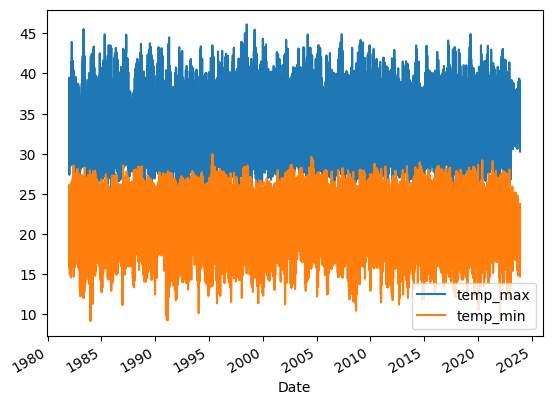

In [12]:
weather_info[["temp_max","temp_min"]].plot()

In [13]:
weather_info.index

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25',
               '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31'],
              dtype='datetime64[ns]', name='Date', length=15065, freq=None)

<AxesSubplot:xlabel='Date'>

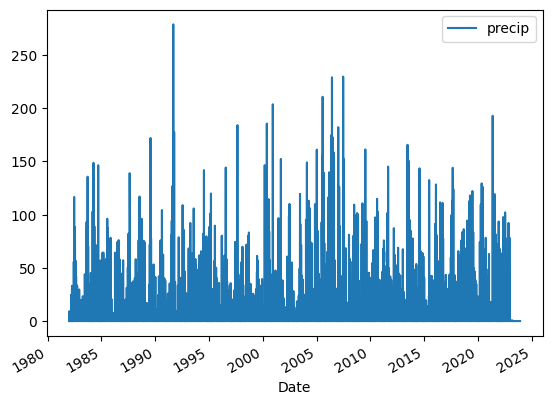

In [14]:
weather_info[["precip"]].plot()

In [15]:
weather_info.groupby(weather_info.index).sum()["precip"]

Date
1982-01-01    0.00
1982-01-02    0.02
1982-01-03    0.00
1982-01-04    0.00
1982-01-05    0.46
              ... 
2023-11-02    0.00
2023-11-03    0.00
2023-12-01    0.00
2023-12-02    0.00
2023-12-03    0.00
Name: precip, Length: 15065, dtype: float64

In [16]:
weather_info["precip"]

Date
1982-01-01    0.00
1982-02-01    0.00
1982-03-01    0.00
1982-04-01    0.00
1982-05-01    0.00
              ... 
2023-03-27    0.00
2023-03-28    0.01
2023-03-29    0.00
2023-03-30    0.01
2023-03-31    0.16
Name: precip, Length: 15065, dtype: float64

In [17]:
weather_info["Target"] = weather_info.shift(-1)["temp_max"]

In [18]:
weather_info

,temp_max,temp_min,precip,month,day,Target
Date,,,,,,
1982-01-01,32.15,17.46,0.00,1,1,32.38
1982-02-01,32.38,17.98,0.00,1,2,31.07
1982-03-01,31.07,18.10,0.00,1,3,29.83
1982-04-01,29.83,18.32,0.00,1,4,32.32
1982-05-01,32.32,16.86,0.00,1,5,32.99
...,...,...,...,...,...,...
2023-03-27,34.61,19.87,0.00,3,27,36.04
2023-03-28,36.04,20.85,0.01,3,28,36.27
2023-03-29,36.27,21.84,0.00,3,29,35.49


In [19]:
weather_info = weather_info.iloc[:-1,:].copy()

In [20]:
weather_info

,temp_max,temp_min,precip,month,day,Target
Date,,,,,,
1982-01-01,32.15,17.46,0.00,1,1,32.38
1982-02-01,32.38,17.98,0.00,1,2,31.07
1982-03-01,31.07,18.10,0.00,1,3,29.83
1982-04-01,29.83,18.32,0.00,1,4,32.32
1982-05-01,32.32,16.86,0.00,1,5,32.99
...,...,...,...,...,...,...
2023-03-26,34.47,18.60,0.00,3,26,34.61
2023-03-27,34.61,19.87,0.00,3,27,36.04
2023-03-28,36.04,20.85,0.01,3,28,36.27


In [21]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [22]:
predictors = ["precip", "temp_max", "temp_min"]

In [23]:
train = weather_info.loc[:"2021-12-31"]
test = weather_info.loc["2022-01-01":]

In [24]:
train

,temp_max,temp_min,precip,month,day,Target
Date,,,,,,
1982-01-01,32.15,17.46,0.00,1,1,32.38
1982-02-01,32.38,17.98,0.00,1,2,31.07
1982-03-01,31.07,18.10,0.00,1,3,29.83
1982-04-01,29.83,18.32,0.00,1,4,32.32
1982-05-01,32.32,16.86,0.00,1,5,32.99
...,...,...,...,...,...,...
2021-12-27,29.65,15.61,0.00,12,27,28.57
2021-12-28,28.57,17.10,0.00,12,28,27.97
2021-12-29,27.97,15.69,0.00,12,29,28.44


In [25]:
reg.fit(train[predictors], train["Target"])

Ridge(alpha=0.1)

In [26]:
predictions = reg.predict(test[predictors])

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["Target"], predictions)

1.2812075397557672

In [28]:
combined = pd.concat([test["Target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [29]:
combined

,actual,predictions
Date,,
2022-01-01,29.72,29.613654
2022-02-01,29.65,29.962483
2022-03-01,30.30,29.880050
2022-04-01,29.41,30.501403
2022-05-01,28.09,29.669342
...,...,...
2023-03-26,34.61,34.500289
2023-03-27,36.04,34.596204
2023-03-28,36.27,35.936984


<AxesSubplot:xlabel='Date'>

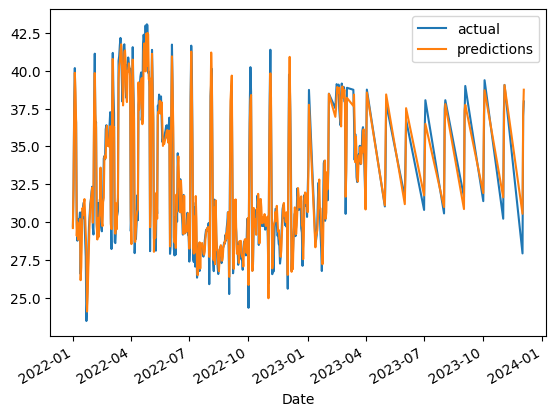

In [30]:
combined.plot()

In [31]:
reg.coef_

array([-1.17235454e-04,  9.58243463e-01, -3.01096780e-02])

In [32]:
weather_info["month_max"] = weather_info["temp_max"].rolling(30).mean()

weather_info["month_day_max"] = weather_info["month_max"] / weather_info["temp_max"]

weather_info["max_min"] = weather_info["temp_max"] / weather_info["temp_min"]

In [33]:
weather_info = weather_info.iloc[30:,:].copy()

In [34]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["Target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["Target"], predictions)
    
    combined = pd.concat([test["Target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [35]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, weather_info, reg)
error

1.257711290164596

<AxesSubplot:xlabel='Date'>

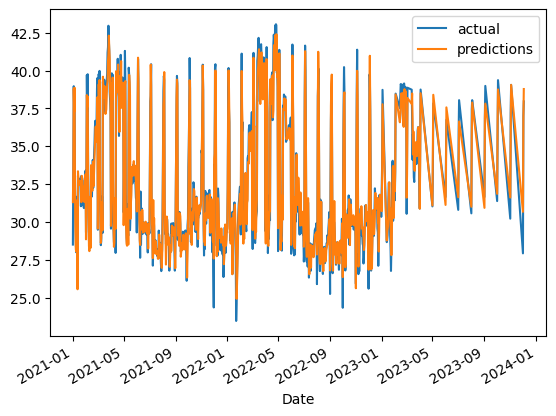

In [36]:
combined.plot()

In [37]:
weather_info["monthly_avg"] = weather_info["temp_max"].groupby(weather_info.index.month).apply(lambda x: x.expanding(1).mean())
weather_info["day_of_year_avg"] = weather_info["temp_max"].groupby(weather_info.index.day_of_year).apply(lambda x: x.expanding(1).mean())

C:\Users\nimat\AppData\Local\Temp\ipykernel_6664\807799491.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  weather_info["monthly_avg"] = weather_info["temp_max"].groupby(weather_info.index.month).apply(lambda x: x.expanding(1).mean())
C:\Users\nimat\AppData\Local\Temp\ipykernel_6664\807799491.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this

In [38]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], weather_info, reg)
error

1.2529307738455875

In [39]:
reg.coef_

array([-2.00272140e-03,  8.72430204e-01, -2.16843684e-02,  2.30224330e+00,
        1.44894170e-01,  1.00671163e-02,  1.15803527e-01])

In [40]:
weather_info.corr()["Target"]

temp_max           0.956557
temp_min           0.060654
precip            -0.363357
month             -0.505642
day               -0.001604
Target             1.000000
month_max          0.845546
month_day_max     -0.353699
max_min            0.455167
monthly_avg        0.551130
day_of_year_avg    0.876995
Name: Target, dtype: float64

In [41]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [42]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
Date,,,
2021-05-16,29.47,38.487852,9.017852
2022-01-22,23.48,28.392687,4.912687
2022-06-02,28.47,33.031189,4.561189
2022-04-20,41.77,37.575636,4.194364
2021-11-29,26.80,30.603891,3.803891
2023-01-28,30.09,33.814206,3.724206
2021-05-13,40.19,36.546616,3.643384
2021-04-21,39.88,36.299841,3.580159
2021-11-30,24.37,27.688334,3.318334


<AxesSubplot:xlabel='Date'>

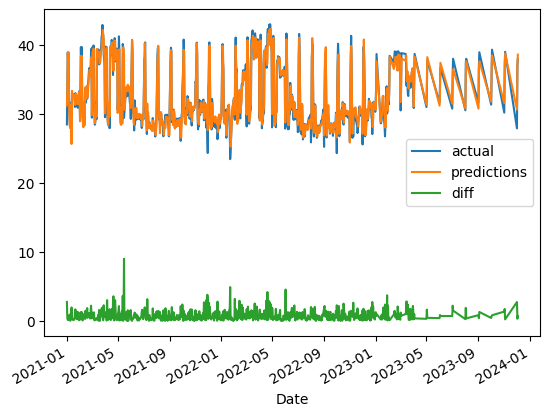

In [43]:
combined.plot()